<a href="https://colab.research.google.com/github/bentech28/AI-E-101-May-17--2024---Bounyamine-Baparape/blob/main/0A_StartTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Math 156 Script 0A-StartTutorial.R

In [ ]:
import pandas as pd  # Importing pandas for data manipulation
import numpy as np  # Importing numpy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

## Topic 1 - Simple arithmetic

In [ ]:
print(4 * 9)  # Simple multiplication
print(3 + 2 * (8 - 4))  # Addition and multiplication with parentheses

36
11


### Creating a vector with five elements

In [ ]:
dog = np.arange(1, 6)
print(dog)  # Displaying the vector

[1 2 3 4 5]


In [ ]:
print(dog + 10)  # Adding 10 to each element of the vector


[11 12 13 14 15]


In [ ]:
print(3 * dog)  # Multiplying each element by 3

[ 3  6  9 12 15]


In [ ]:
print(np.sum(dog))  # Sum of the elements of the vector

15


# ?sum equivalent in Python: you can use help(np.sum) or np.sum?


## Topic 2 - Importing and analyzing data

### Importing data from a CSV file

In [ ]:
FlightDelays = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA/FlightDelays.csv")

### Displaying column names

In [ ]:
print(FlightDelays.columns)  # Displaying column names

Index(['ID', 'Carrier', 'FlightNo', 'Destination', 'DepartTime', 'Day',
       'Month', 'FlightLength', 'Delay', 'Delayed30'],
      dtype='object')


### Displaying the first few rows

In [ ]:
print(FlightDelays.head())  # Displaying the first few rows

   ID Carrier  FlightNo Destination DepartTime  Day Month  FlightLength  \
0   1      UA       403         DEN      4-8am  Fri   May           281   
1   2      UA       405         DEN     8-Noon  Fri   May           277   
2   3      UA       409         DEN      4-8pm  Fri   May           279   
3   4      UA       511         ORD     8-Noon  Fri   May           158   
4   5      UA       667         ORD      4-8am  Fri   May           143   

   Delay Delayed30  
0     -1        No  
1    102       Yes  
2      4        No  
3     -2        No  
4     -3        No  


### Dimensions of the DataFrame (number of rows and columns)

In [ ]:
print(FlightDelays.shape)  # Dimensions of the DataFrame (number of rows and columns)

(4029, 10)


### Counting occurrences of each destination

In [ ]:
print(FlightDelays['Destination'].value_counts())  # Counting occurrences of each destination

Destination
ORD    1785
DFW     918
MIA     610
DEN     264
STL     225
BNA     172
IAD      55
Name: count, dtype: int64


### Bar plot of destinations

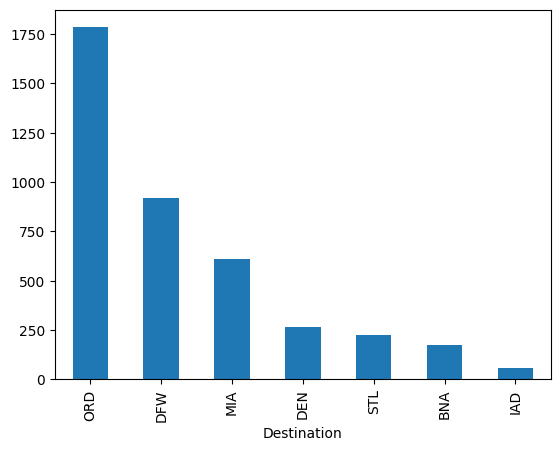

In [ ]:
FlightDelays['Destination'].value_counts().plot(kind='bar')  # Bar plot of destinations
plt.show()  # Displaying the plot (uncomment if in an interactive environment)

### Displaying the plot (uncomment if in an interactive environment)

In [ ]:
plt.show()  # Displaying the plot (uncomment if in an interactive environment)

### Histogram of delays

<Axes: >

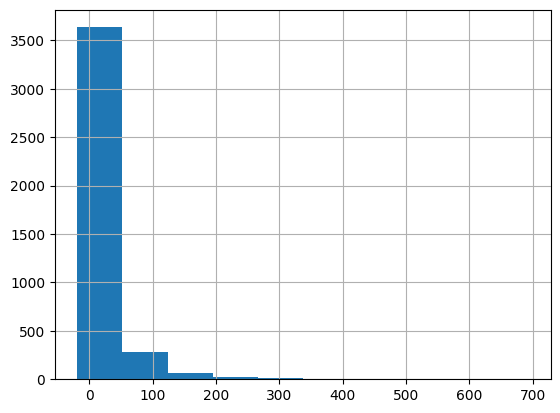

In [ ]:
FlightDelays['Delay'].hist()

### Displaying the plot (uncomment if in an interactive environment)

In [ ]:
plt.show()  # Displaying the plot (uncomment if in an interactive environment)


### Saving the Delay column as a vector

In [ ]:
delay = FlightDelays['Delay']

In [ ]:
print(np.mean(delay))  # Mean of the delays

11.73790022338049


In [ ]:
print(np.median(delay))  # Median of the delays

-3.0


### Trimmed mean is not directly available in numpy, using scipy for trimmed mean

In [ ]:
from scipy.stats import trim_mean

In [ ]:
print(trim_mean(delay, 0.25))  # Trimmed mean at 25%

-2.133995037220844


In [ ]:
print(np.max(delay))  # Maximum delay

693


In [ ]:
print(np.min(delay))  # Minimum delay

-19


In [ ]:
print(np.ptp(delay))  # Range of delays

712


In [ ]:
print(np.var(delay, ddof=1))  # Sample variance

1733.0981188271821


In [ ]:
print(np.std(delay, ddof=1))  # Sample standard deviation

41.63049505863679


In [ ]:
print(np.quantile(delay, [0.25, 0.5, 0.75]))  # Quartiles

[-6. -3.  5.]


In [ ]:
# Calculating population variance
n = len(delay)
print((n-1)/n * np.var(delay, ddof=1))

1732.6679629277462


In [ ]:
# Mean delay by carrier
print(FlightDelays.groupby('Carrier')['Delay'].mean())

Carrier
AA    10.097385
UA    15.983081
Name: Delay, dtype: float64


In [ ]:
# Median delay by departure time
print(FlightDelays.groupby('DepartTime')['Delay'].median())

DepartTime
4-8am      -3.0
4-8pm       0.0
8-Mid       6.0
8-Noon     -4.0
Noon-4pm   -2.0
Name: Delay, dtype: float64


In [ ]:
print(delay.describe())  # Statistical summary of delays

count    4029.000000
mean       11.737900
std        41.630495
min       -19.000000
25%        -6.000000
50%        -3.000000
75%         5.000000
max       693.000000
Name: Delay, dtype: float64


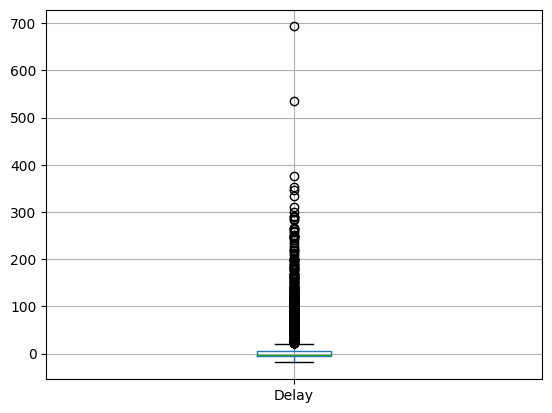

In [ ]:
FlightDelays.boxplot(column='Delay')  # Box plot of delays
plt.show()  # Displaying the plot (uncomment if in an interactive environment)

In [ ]:
# Statistical summary of delays by day of the week
print(FlightDelays.groupby('Day')['Delay'].describe())

     count       mean        std   min  25%  50%    75%    max
Day                                                           
Fri  637.0  20.626374  49.975105 -15.0 -4.0  0.0  24.00  377.0
Mon  630.0   5.868254  32.427247 -15.0 -6.0 -3.0   0.00  260.0
Sat  453.0   5.450331  29.627112 -17.0 -7.0 -4.0   0.00  240.0
Sun  551.0   5.223230  41.548253 -16.0 -6.0 -4.0   0.00  693.0
Thu  566.0  21.249117  50.134860 -12.0 -5.0  0.0  26.00  536.0
Tue  628.0  13.898089  45.934797 -19.0 -6.0 -2.0   5.00  299.0
Wed  564.0   7.719858  28.746264 -17.0 -6.0 -3.0   3.25  214.0


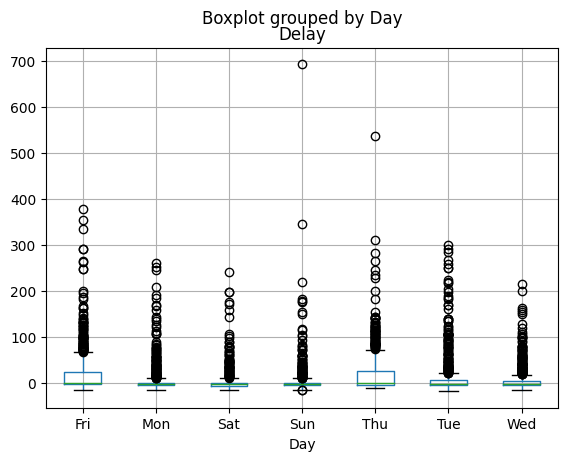

In [ ]:
# Box plot of delays by day of the week
FlightDelays.boxplot(column='Delay', by='Day')
plt.show()  # Displaying the plot (uncomment if in an interactive environment)

In [ ]:
# Statistical summary of delays by departure time
print(FlightDelays.groupby('DepartTime')['Delay'].describe())

             count       mean        std   min  25%  50%   75%    max
DepartTime                                                           
4-8am        699.0   0.274678  21.403654 -16.0 -6.0 -3.0  -1.0  311.0
4-8pm        972.0  22.529835  49.358043 -17.0 -5.0  0.0  30.0  334.0
8-Mid        257.0  29.190661  62.397468 -19.0 -5.0  6.0  46.0  693.0
8-Noon      1053.0   4.720798  35.346195 -13.0 -6.0 -4.0   0.0  536.0
Noon-4pm    1048.0  12.145038  39.688182 -14.0 -6.0 -2.0   9.0  346.0


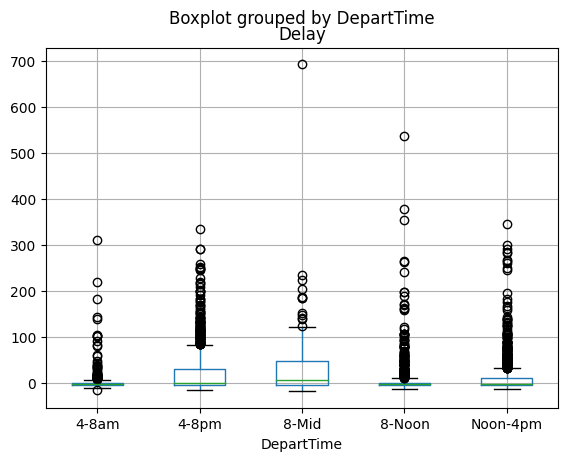

In [ ]:
# Box plot of delays by departure time
FlightDelays.boxplot(column='Delay', by='DepartTime')
plt.show()  # Displaying the plot (uncomment if in an interactive environment)

In [ ]:
# Creating a list of numbers from 10 to 35
fish25 = list(range(10, 36))
print(fish25)  # Displaying the list

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


In [ ]:
try:
    print(whale)  # Attempting to print an undefined variable
except NameError:
    print("whale is not defined")  # Error message if the variable is not defined

whale is not defined


In [ ]:

whale = 200  # Defining the variable whale
print(globals())  # Displaying global variables

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', 'import pandas as pd  # Importing pandas for data manipulation\nimport numpy as np  # Importing numpy for numerical operations\nimport matplotlib.pyplot as plt  # Importing matplotlib for plotting', 'print(4 * 9)  # Simple multiplication\nprint(3 + 2 * (8 - 4))  # Addition and multiplication with parentheses', 'print(4 * 9)  # Simple multiplication\nprint(3 + 2 * (8 - 4))  # Addition and multiplication with parentheses', 'dog = np.arange(1, 6)\nprint(dog)  # Displaying the vector', 'print(dog + 10)  # Adding 10 to each element of the vector', 'print(3 * dog)  # Multiplying each element by 3', 'print(np.sum(dog))  # Sum of the elements of the vector', 'FlightDelays = pd.read_csv("FlightDelays.csv")', 'FlightDelays = pd.re

In [ ]:
del whale  # Deleting the variable whale
print(globals())  # Displaying global variables after deletion

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', 'import pandas as pd  # Importing pandas for data manipulation\nimport numpy as np  # Importing numpy for numerical operations\nimport matplotlib.pyplot as plt  # Importing matplotlib for plotting', 'print(4 * 9)  # Simple multiplication\nprint(3 + 2 * (8 - 4))  # Addition and multiplication with parentheses', 'print(4 * 9)  # Simple multiplication\nprint(3 + 2 * (8 - 4))  # Addition and multiplication with parentheses', 'dog = np.arange(1, 6)\nprint(dog)  # Displaying the vector', 'print(dog + 10)  # Adding 10 to each element of the vector', 'print(3 * dog)  # Multiplying each element by 3', 'print(np.sum(dog))  # Sum of the elements of the vector', 'FlightDelays = pd.read_csv("FlightDelays.csv")', 'FlightDelays = pd.re

In [ ]:
# Spaces are insignificant in Python
print(3 + 4)
print(3 + 4)
print(np.mean([3 + 5]))
print(np.mean([3 + 5]))

7
7
8.0
8.0


## Topic 3 - Vectors, arithmetic, and logical values

In [ ]:
print(list(range(1, 11)))  # Creating a vector from 1 to 10

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
print(list(range(5, -4, -1)))  # Creating a vector from 5 to -3

[5, 4, 3, 2, 1, 0, -1, -2, -3]


In [ ]:
print(np.arange(0, 3.2, 0.2))  # Sequence from 0 to 3 by 0.2

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3. ]


In [ ]:
print(np.linspace(0, 3, 15))  # Sequence from 0 to 3 in 15 points

[0.         0.21428571 0.42857143 0.64285714 0.85714286 1.07142857
 1.28571429 1.5        1.71428571 1.92857143 2.14285714 2.35714286
 2.57142857 2.78571429 3.        ]


In [ ]:
print(np.quantile(delay, np.arange(0, 1.1, 0.1)))  # Deciles of delay

[-19.   -8.   -6.   -5.   -4.   -3.   -1.    1.   15.   51.2 693. ]


In [ ]:
print(np.array([1, 4, 8, 2, 9]))
x = np.array([2, 0, -4])
print(x)
print(np.concatenate([x, np.arange(6), x]))

[1 4 8 2 9]
[ 2  0 -4]
[ 2  0 -4  0  1  2  3  4  5  2  0 -4]


In [ ]:
# Character vectors
print(np.array(["a", "b", "c", "d"]))
# Logical vectors
print(np.array([True, False, False, True, True, False]))

['a' 'b' 'c' 'd']
[ True False False  True  True False]


In [ ]:
# Repeating values with rep()
print(np.repeat("a", 5))

['a' 'a' 'a' 'a' 'a']


In [ ]:
print(np.tile(["a", "b"], 5))


['a' 'b' 'a' 'b' 'a' 'b' 'a' 'b' 'a' 'b']


In [ ]:
print(np.repeat(["a", "b"], [5, 2]))

['a' 'a' 'a' 'a' 'a' 'b' 'b']


In [1]:
# Class attribute
print(pd.Series(state.name).dtype)

NameError: name 'pd' is not defined

In [ ]:
print(pd.Series(state.name) == "Idaho")

In [ ]:
print((pd.Series(state.name) == "Idaho").dtype)

In [ ]:
print(FlightDelays['Carrier'].head())

In [ ]:
print(FlightDelays['Carrier'].dtype)

### Basic arithmetic with vectors

In [ ]:
x = np.arange(1, 6)

In [ ]:
print(x - 3)  # Subtraction

In [ ]:
print(x * 10)  # Multiplication

In [ ]:
print(x / 10)  # Division

In [ ]:
print(x ** 2)  # Squaring

In [ ]:
print(2 ** x)  # Exponentiation

In [ ]:
print(np.log(x))  # Natural logarithm

### Multiplication of vectors

In [ ]:

w = np.arange(6, 11)
print(w)

In [ ]:
print(x * w)  # Element-wise multiplication

### Logical expressions

In [ ]:
print(x < 3)  # Less than
print(x == 4)  # Equality

### Indexing with vectors

In [ ]:
z = np.array([8, 3, 0, 9, 9, 2, 1, 3])
print(z[3])  # Accessing the 4th element

In [ ]:
print(z[[0, 2, 3]])  # Accessing multiple elements

In [ ]:
print(np.delete(z, [0, 2, 3]))  # Deleting multiple elements

In [ ]:
index = np.where(z < 4)  # Finding indices where condition is met

In [ ]:
print(index)

In [ ]:
print(z[index])  # Accessing elements by indices

## Topic 4 - Working with data frames in Python

### Selecting the Delay column

In [ ]:
delay = FlightDelays['Delay']
print(FlightDelays[['Delay']])


### Conditional selection and mean calculation

In [ ]:
delay2 = FlightDelays[FlightDelays['Day'] != "Mon"]['Delay']
print(np.mean(delay2))

### Conditional selection for weekends and mean calculation

In [ ]:
delay3 = FlightDelays[(FlightDelays['Day'] == "Sat") | (FlightDelays['Day'] == "Sun")]['Delay']
print(np.mean(delay3))

### Indexing delays greater than the mean

In [ ]:
index = np.where(delay > np.mean(delay))[0]
print(index[:5])

### Length and sum of elements in z

In [ ]:
print(len(z))

In [ ]:
print(np.sum(z))

In [ ]:
print(np.sort(z))

### Random sampling

In [ ]:

print(np.random.choice(range(1, 11), 10, replace=False))

In [ ]:
print(np.random.choice(range(1, 11), 4, replace=False))

In [ ]:
print(np.random.choice(range(1, 11), 4, replace=True))

### Random sampling of state names

In [ ]:
print(state.name)

In [ ]:
print(np.random.choice(state.name, 20))

In [ ]:
print(np.random.choice(state.name, 20, replace=True))

In [ ]:
### Random sampling of indices

In [ ]:
index = np.random.choice(50, 20, replace=False)
print(index)

In [ ]:
tempA = pd.Series(state.name)[index]

In [ ]:
tempB = pd.Series(state.name).drop(index)

In [ ]:
print(tempA)

In [ ]:
print(tempB)

### Inspecting the DataFrame

In [ ]:
print(FlightDelays.dtypes)  # Displaying the data types of each column

In [ ]:
print(FlightDelays.iloc[4, 2])  # Accessing the value at 5th row and 3rd column

In [ ]:
print(FlightDelays.iloc[:10, [0, 2]])  # Accessing the first 10 rows for 1st and 3rd columns

In [ ]:
print(FlightDelays.iloc[10:, [0, 2]])  # Accessing rows from 11 onwards for 1st and 3rd columns

In [ ]:
print(FlightDelays.iloc[:, [0, 2]])  # Accessing all rows for 1st and 3rd columns

In [ ]:
print(FlightDelays.iloc[:100, :])  # Accessing the first 100 rows for all columns

### Filtering delays for Tuesday

In [ ]:
DelaysTue = FlightDelays[FlightDelays['Day'] == "Tue"]
print(DelaysTue.head())  # Displaying the first few rows of delays on Tuesday

In [ ]:
DelaysTue = FlightDelays[FlightDelays['Day'] == "Tue"][['Flight', 'Delay', 'Carrier']]
print(DelaysTue.head())  # Displaying the first few rows with selected columns for delays on Tuesday
